In [1]:
import numpy as np
from numpy.linalg import inv
import CostFunction

Initialize the parameter vector to zero, and train the logistic regression by Newton's method (by default, 10 iterations).

In [2]:
def logistic_reg(X, y, max_iterations = 10):
    n = X.shape[1]
    theta = np.zeros((n,1))
    J, grad, hess = CostFunction.costFunction(theta, X, y)
    print('Initial cost:', J)
    for i in range(max_iterations):
        theta = theta - np.matmul(inv(hess), grad)
        J, grad, hess = CostFunction.costFunction(theta, X, y)
        print('Cost after iteration', str(i+1), ':', J)
    return theta

Here we load the two data files.

In [3]:
temp = []
with open('logistic_x.txt') as f:
    for line in f:
        x = line.rstrip("\n").strip().split(' ')
        while '' in x:
            x.remove('')
        temp.append(x)
m = len(temp)
n = len(temp[0]) + 1
X = np.zeros((m,n))
for i in range(m):
    X[i,:] = 1, float(temp[i][0]), float(temp[i][1])

temp = []
with open('logistic_y.txt') as f:
    for line in f:
        temp.append(float(line.rstrip("\n").strip()))
y = np.zeros((len(temp), 1))
y[:,0] = temp

Run the logistic regression to obtain the coefficient vector.

In [4]:
theta = logistic_reg(X, y)

Initial cost: 0.693147180559946
Cost after iteration 1 : 0.374724707576039
Cost after iteration 2 : 0.3342501357695514
Cost after iteration 3 : 0.3292811994797007
Cost after iteration 4 : 0.32914756442755344
Cost after iteration 5 : 0.3291474312958552
Cost after iteration 6 : 0.32914743129571206
Cost after iteration 7 : 0.329147431295712
Cost after iteration 8 : 0.32914743129571206
Cost after iteration 9 : 0.32914743129571206
Cost after iteration 10 : 0.329147431295712


The cost function seems to converge (at around 0.329147) after 6 iterations.

In [5]:
print(theta)

[[-2.6205116 ]
 [ 0.76037154]
 [ 1.17194674]]


Note that the first element is the intercept term, while the second and the third correspond to the coefficients of x1, x2 in this order.

###################################################################################################################

In [6]:
import matplotlib.pyplot as plt

In [7]:
# Only need to use x1 and x2 variables in the plot
x1 = X[:,1]
x1 = x1.reshape((x1.shape[0],1))
x2 = X[:,2]
x2 = x2.reshape((x2.shape[0],1))

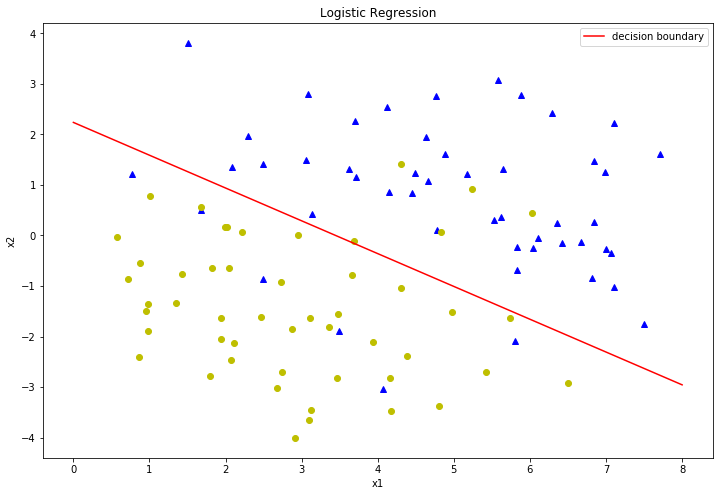

In [8]:
fig = plt.figure(1, figsize=(12,8))

# Re-write the straight line equation from standard form to slope-intercept form for plotting purpose
slope = -theta[1]/theta[2]
intercept = -theta[0]/theta[2]
x_line = np.linspace(0,8,2)   # num = 2 is sufficient to plot a straight line 
y_line = slope * x_line + intercept

# Plot the data in two classes
plt.plot(x1[y==1], x2[y==1], 'b^', x1[y==-1], x2[y==-1], 'yo')
plt.plot(x_line, y_line, '-r', label='decision boundary')

# Other settings
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Logistic Regression')
plt.legend(loc='upper right')
plt.show()